## RIO 208 : TP DIMENSIONNEMENT OFDMA
##### Nom : LEE Joe Ing 
##### Date : 03/06/2022
***

### 1.  Introduction
XX

### 2.  Implémentation du modèle
À chaque intervalle de temps, un utilisateur a une probabilité $p$ d’émettre. Si on fixe un intervalle de temps, on cherche à déterminer la probabilité avec laquelle le nombre de ressources demandées à ce moment là sera inférieur au nombre de ressources disponibles. 

On suppose que le seul point d’accès est localisé en (0, 0). Les mobiles sont répartis selon un processus de Poisson d’intensité λ utilisateurs par unité de surface. On limitera l’observation à un cellule circulaire de rayon $R$.

1. Simuler le processus des utilisateurs répartis selon un processus de Poisson d’intensité $λ = 0.01m^{−2}$ dans la cellule de rayon $R = 320m$.

Nombre d'utilisateurs tiré par la loi de Poisson :  3268


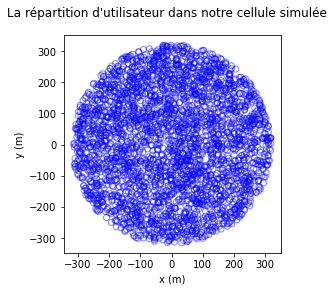

In [1]:
import math
import random
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

intensityUser = 0.01 # intensité de'utilisateurs par unité de surface en m^-2
R = 320 # rayon de la cellule en mètre
area = (math.pi)* math.pow(R,2)
measure = intensityUser * area
nbUsers = scipy.stats.poisson(measure).rvs()#Poisson number of points

print("Nombre d'utilisateurs tiré par la loi de Poisson : ",nbUsers)

tabx = []
taby = []

x0 = 0
y0 = 0

for i in range(nbUsers):
    angle = 2*(math.pi)*random.random()
    radius = R*math.sqrt(random.random())
    x = x0 + radius * np.cos(angle)
    y = y0 + radius * np.sin(angle) 
    
    tabx.append(x)
    taby.append(y)

#plot
fig = plt.figure()
fig.suptitle('La répartition d\'utilisateur dans notre cellule simulée')
plt.scatter(tabx,taby, edgecolor='b', facecolor='none', alpha=0.5 )
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.show()

2. Quel est le nombre moyen d’utilisateurs dans la cellule ?

In [2]:
moyenUser = round(measure)
print("Nombre moyen d'utilisateurs dans la cellule : ",moyenUser)

Nombre moyen d'utilisateurs dans la cellule :  3217


On rappelle que pour simuler un processus de Poisson, il faut dans un premier temps tirer le nombre de points suivant une loi de Poisson, puis simuler la position de chaque point uniformément dans le disque. On pourra utiliser des coordonnées polaires pour générer les positions des points, ou utiliser la méthode du rejet en simulant sur le carré de côté $2R$ et en rejetant les points tombant à l’extérieur du disque.

3. Quel est le processus des utilisateurs actifs à chaque instant dans la cellule ? et quel est leur nombre moyen ? La probabilité pour un utilisateur d’être actif vaut $p = 0.01$.

Nombre d'utilisateurs actifs dans la cellule :  31
Nombre moyen d'utilisateurs actifs dans la cellule :  32


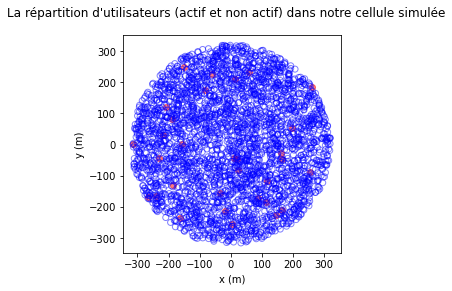

In [3]:
probaActif = 0.01 # probabilité pour un utilisateur d’être actif
measureActif = measure*probaActif
nbUsersActif = scipy.stats.poisson(measureActif).rvs()#Poisson number of points

print("Nombre d'utilisateurs actifs dans la cellule : ",nbUsersActif)
print("Nombre moyen d'utilisateurs actifs dans la cellule : ", round(measureActif))

tabxActif = []
tabyActif = []

x0 = 0
y0 = 0

for i in range(nbUsersActif):
    angle = 2*(math.pi)*random.random()
    radius = R*math.sqrt(random.random())
    x = x0 + radius * np.cos(angle)
    y = y0 + radius * np.sin(angle) 
    
    tabxActif.append(x)
    tabyActif.append(y)

#plot
fig = plt.figure()
fig.suptitle('La répartition d\'utilisateurs (actif et non actif) dans notre cellule simulée')
plt.scatter(tabxActif,tabyActif, edgecolor='r', facecolor='r', alpha=0.5 )
plt.scatter(tabx,taby, edgecolor='b', facecolor='none', alpha=0.5 )
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('square')
plt.show()

A partir de maintenant, on ne considère que le processus des utilisateurs actifs.

4. Calculer $q_{max}$ le nombre maximum de ressources qu’un utilisateur peut demander. On considère que tous les utilisateurs demandent un débit de C = 162kb/s, et la largeur de bande d’un resource block est de w = 180kHz. Le  $SNR_{min}$  vaut $0.1$.


In [4]:
C = 162 # débit demandé en kb/s
w = 180 # largeur de bande d’un resource block en kHz
SNRmin = 0.1 # rapport signal sur bruit minimum pour que la communication puisse s’établir

qmax = math.ceil(C/(w*math.log2(1+SNRmin)))# nombre maximum de ressources qu’un utilisateur peut demander

print("Le nombre maximum de ressources qu’un utilisateur peut demander est",qmax, ".")

Le nombre maximum de ressources qu’un utilisateur peut demander est 7 .


### 3.  Probabilité d’Outage

Le nombre total de ressources demandées dans la cellule est : $ F= \sum \limits _{x\in N} q(x)$

On dit qu’il y a outage lorsque le nombre de ressources demandées F est supérieur au nombre de ressources disponibles S. On note $P_S = P(F ≥ S)$ la probabilité d’outage quand la cellule dispose de S resource blocks.

5. Estimer $P_S$ pour S allant de $S_{min}$ = 160 à $S_{max}$  = 180. La probabilité $P_S$ s’estime en comptant le nombre de fois où il y a outage sur 10000 simulations. On prend les valeurs numériques suivantes : $K = 10^6$ et $\gamma = 2,8$.

In [5]:
def ressource(C,w,K,rx,gamma):
    SNR = K/math.pow(rx,gamma)
    if SNR > SNRmin : 
        res = math.ceil(C/(w*math.log2(1+SNR)))
    else : 
        res = qmax
    return res

In [6]:
nbSimu = 10000
Smin = 160
Smax = 180
K = math.pow(10,6)
gamma = 2.8
freqOutage = np.zeros(22)

for k in range (nbSimu):
    nbUsersActifsimu = scipy.stats.poisson(measureActif).rvs()#Poisson number of points
    tabxActifSimu = []
    tabyActifSimu = []
    x0 = 0
    y0 = 0
    
    for p in range(nbUsersActifsimu):
        angleSimu = 2*(math.pi)*random.random()
        radiusSimu = R*math.sqrt(random.random())
        xSimu = x0 + radiusSimu * np.cos(angleSimu)
        ySimu = y0 + radiusSimu * np.sin(angleSimu) 
        tabxActifSimu.append(xSimu)
        tabyActifSimu.append(ySimu)
    
    for S in range(Smin,Smax+1):
        F = 0
        
        for i in range(nbUsersActifsimu):
            rx = math.dist((0,0),(tabxActifSimu[i],tabyActifSimu[i]))
            F += ressource(C,w,K,rx,gamma)
        if F > S:
            currentIndex = S-160
            freqOutage[currentIndex] += 1

probaOutage = freqOutage/nbSimu

for S in range(Smin,Smax+1):
    print("Probabilité d'outage pour S =",S, "vaut", probaOutage[S-160],".")

Probabilité d'outage pour 160 vaut 0.0216 .
Probabilité d'outage pour 161 vaut 0.0192 .
Probabilité d'outage pour 162 vaut 0.0176 .
Probabilité d'outage pour 163 vaut 0.0159 .
Probabilité d'outage pour 164 vaut 0.0144 .
Probabilité d'outage pour 165 vaut 0.0128 .
Probabilité d'outage pour 166 vaut 0.0115 .
Probabilité d'outage pour 167 vaut 0.0108 .
Probabilité d'outage pour 168 vaut 0.0098 .
Probabilité d'outage pour 169 vaut 0.0088 .
Probabilité d'outage pour 170 vaut 0.0079 .
Probabilité d'outage pour 171 vaut 0.007 .
Probabilité d'outage pour 172 vaut 0.0062 .
Probabilité d'outage pour 173 vaut 0.0057 .
Probabilité d'outage pour 174 vaut 0.0052 .
Probabilité d'outage pour 175 vaut 0.0044 .
Probabilité d'outage pour 176 vaut 0.0043 .
Probabilité d'outage pour 177 vaut 0.004 .
Probabilité d'outage pour 178 vaut 0.0033 .
Probabilité d'outage pour 179 vaut 0.0031 .
Probabilité d'outage pour 180 vaut 0.0028 .


6. Combien valent β et α tels que $D_xF(N) \leq β$, et $\int_{Cellule} |D_xF(N)|^2 d\mu(x) \leq α^2 $ pour presque tout point x de la cellule et presque toute réalisation N du processus de Poisson des utilisateurs actifs ?

In [7]:
#pg4

lambda1 = intensityUser*probaActif
beta = qmax
alpha = qmax*R*math.sqrt((lambda1*(math.pi)))

print("β :",beta)
print("α :",alpha)

β : 7
α : 39.70296626028356


7. Combien vaut le nombre moyen de ressources $E[F]$ demandées dans la cellule?

In [8]:
def calculrk(k):
    if(k==0):
        rk=0
    elif k == qmax:
        rk = R
    else:
        puiss = C/(k*w)
        rk = math.pow((K/(math.pow(2,puiss)-1)),(1/gamma))
    return rk

In [9]:
somme = 0
for k in range (1, qmax+1):
    somme += (k* (math.pow(calculrk(k),2)- math.pow(calculrk(k-1),2))) 

nbMoyenRes = lambda1*math.pi*somme
print("Le nombre moyen de ressources 𝐸[𝐹] demandées dans la cellule :", nbMoyenRes)

Le nombre moyen de ressources 𝐸[𝐹] demandées dans la cellule : 112.07637130779693


8. Vérifier que l’inégalité de concentration est bien vérifiée dans les résultats de simulation de la question 4.

<center>$P(F \geq E[F]+y)\leq exp[-(\frac{y}{\beta} + \frac{\alpha^2}{\beta^2} )ln(1+\frac{\beta y}{\alpha^2})+ \frac{y}{\beta}]$</center>

In [16]:
def concentration(y):
    res = (math.exp(-((y/beta)+(math.pow(alpha,2)/math.pow(beta,2)))*math.log(1+(beta*y)/(math.pow(alpha,2)))+ (y/beta)))
    return res

for S in range(Smin,Smax+1):
    y = S-nbMoyenRes
    rhs = concentration(y)
    
    if rhs >= probaOutage[S-160]:
        print("L’inégalité de concentration est bien vérifiée pour S =",S, "car",probaOutage[S-160],"<=", rhs, ".")
    else:
        print("L’inégalité de concentration n'est vérifiée pour S =",S, "car",probaOutage[S-160],">", rhs, ".")

L’inégalité de concentration est bien vérifiée pour S = 160 car 0.0216 <= 0.5057588455981579 .
L’inégalité de concentration est bien vérifiée pour S = 161 car 0.0192 <= 0.49188026839631366 .
L’inégalité de concentration est bien vérifiée pour S = 162 car 0.0176 <= 0.4781332844016018 .
L’inégalité de concentration est bien vérifiée pour S = 163 car 0.0159 <= 0.4645292207771427 .
L’inégalité de concentration est bien vérifiée pour S = 164 car 0.0144 <= 0.45107878311678107 .
L’inégalité de concentration est bien vérifiée pour S = 165 car 0.0128 <= 0.4377920537041002 .
L’inégalité de concentration est bien vérifiée pour S = 166 car 0.0115 <= 0.4246784915704095 .
L’inégalité de concentration est bien vérifiée pour S = 167 car 0.0108 <= 0.4117469342800955 .
L’inégalité de concentration est bien vérifiée pour S = 168 car 0.0098 <= 0.39900560136810553 .
L’inégalité de concentration est bien vérifiée pour S = 169 car 0.0088 <= 0.38646209935104064 .
L’inégalité de concentration est bien vérifiée

9. On cherche à dimensionner la cellule avec l’inégalité de concentration : déterminer le nombre de ressources S nécessaires pour avoir le majorant de la probabilité d’outage $P_S$ inférieur à 0.01.

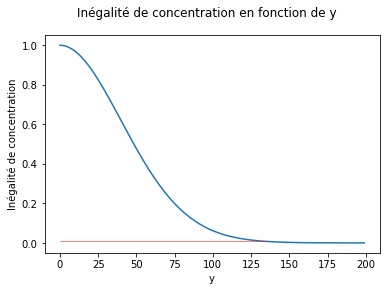

D'après la courbe ci-dessus, le majorant du seuil se situe entre 125 et 135.


In [67]:
inegalites = []

for ytest in range (0,200):
    inegalites.append(concentration(ytest))
    
#plot
fig = plt.figure()
fig.suptitle('Inégalité de concentration en fonction de y')
plt.plot(inegalites)
plt.hlines(y=0.01, xmin=0, xmax=135, linewidth=0.5, color='r')
plt.xlabel('y')
plt.ylabel('Inégalité de concentration')
plt.show()
print("D'après la courbe ci-dessus, le majorant du seuil se situe entre 125 et 135.")

In [60]:
seuil = 0.01
yfinal = 0
diffnew = 1

for ytest in range (125,135):
    diff = seuil - concentration(ytest)
    if diff >= 0 and diff < diffnew:
        diffnew = diff
        yfinal = ytest

S_majorant = yfinal+nbMoyenRes
print("Il faut S =",str(round(S_majorant)), "pour avoir une inégalité de concentration inférieur à", str(round(concentration(yfinal),2)),".")

Il faut S = 243 pour avoir une inégalité de concentration inférieur à 0.01 .


10. On considère le dimensionnement S obtenu à la question précédente. Que vaut alors la probabilité d’outage $P_s$ ?

In [64]:
nbSimu = 10000
K = math.pow(10,6)
gamma = 2.8
freqOutage_majorant = 0

for k in range (nbSimu):
    nbUsersActifsimu_majorant = scipy.stats.poisson(measureActif).rvs()#Poisson number of points
    tabxActifSimu_majorant = []
    tabyActifSimu_majorant = []
    x0_majorant = 0
    y0_majorant = 0
    
    for p in range(nbUsersActifsimu_majorant):
        angleSimu_majorant = 2*(math.pi)*random.random()
        radiusSimu_majorant = R*math.sqrt(random.random())
        xSimu_majorant = x0 + radiusSimu_majorant * np.cos(angleSimu_majorant)
        ySimu_majorant = y0 + radiusSimu_majorant * np.sin(angleSimu_majorant) 
        tabxActifSimu_majorant.append(xSimu_majorant)
        tabyActifSimu_majorant.append(ySimu_majorant)
    
    F_majorant = 0
        
    for i in range(nbUsersActifsimu_majorant):
        rx_majorant = math.dist((0,0),(tabxActifSimu_majorant[i],tabyActifSimu_majorant[i]))
        F_majorant += ressource(C,w,K,rx_majorant,gamma)
    if F_majorant > S_majorant:
        freqOutage_majorant += 1

probaOutage_majorant = freqOutage_majorant/nbSimu

print("Probabilité d'outage pour S =",round(S_majorant), "vaut", probaOutage_majorant,".")

Probabilité d'outage pour S = 243 vaut 0.0 .


11. Toujours en utilisant le même dimensionnement S, calculer la probabilité d’outage dans le cas où $λ$ varie de 10%, puis de 20%, puis si c’est $\gamma$ qui varie de 2%, puis de 5%.

In [69]:
nbSimu = 10000
K = math.pow(10,6)
gamma = 2.8
freqOutage1 = 0

percentage_lambda = [0.1,0.2]

for m in range (2):
    
        intensityUser1 = 0.01*percentage_lambda[m]# intensité de'utilisateurs par unité de surface en m^-2
        R = 320 # rayon de la cellule en mètre
        area = (math.pi)* math.pow(R,2)
        measure1 = intensityUser1 * area
        probaActif1 = 0.01 # probabilité pour un utilisateur d’être actif
        measureActif1 = measure1*probaActif1
        
        for k in range (nbSimu):
            nbUsersActif1 = scipy.stats.poisson(measureActif1).rvs()#Poisson number of points
            tabxActif1 = []
            tabyActif1 = []
            x0 = 0
            y0 = 0
            
            for i in range(nbUsersActif1):
                angle1 = 2*(math.pi)*random.random()
                radius1 = R*math.sqrt(random.random())
                x1 = x0 + radius1 * np.cos(angle1)
                y1 = y0 + radius1 * np.sin(angle1) 
                tabxActif1.append(x1)
                tabyActif1.append(y1)
                
            F1 = 0
            
            for i in range(nbUsersActif1):
                rx1 = math.dist((0,0),(tabxActif1[i],tabyActif1[i]))
                F1 += ressource(C,w,K,rx1,gamma)
                
            if F1 > S_majorant:
                freqOutage1 += 1
        
        probaOutage1 = freqOutage1/nbSimu
        print("λ = ",percentage_lambda[m], "Probabilité d'outage pour S =",round(S_majorant), "vaut", probaOutage1,".")

λ =  0.1 Probabilité d'outage pour S = 243 vaut 0.0 .
λ =  0.2 Probabilité d'outage pour S = 243 vaut 0.0 .


In [70]:
nbSimu = 10000
K = math.pow(10,6)
gamma = 2.8
freqOutage2 = 0

percentage_gamma = [0.02,0.05]

for n in range (2):
    
        intensityUser2 = 0.01# intensité de'utilisateurs par unité de surface en m^-2
        R = 320 # rayon de la cellule en mètre
        area = (math.pi)* math.pow(R,2)
        measure2= intensityUser2 * area
        probaActif2 = 0.01 # probabilité pour un utilisateur d’être actif
        measureActif2 = measure1*probaActif2
        
        for k in range (nbSimu):
            nbUsersActif2 = scipy.stats.poisson(measureActif2).rvs()#Poisson number of points
            tabxActif2 = []
            tabyActif2 = []
            x0 = 0
            y0 = 0
            
            for i in range(nbUsersActif2):
                angle2 = 2*(math.pi)*random.random()
                radius2 = R*math.sqrt(random.random())
                x2 = x0 + radius2 * np.cos(angle2)
                y2 = y0 + radius2 * np.sin(angle2) 
                tabxActif2.append(x2)
                tabyActif2.append(y2)
                
            F2 = 0
            
            for i in range(nbUsersActif2):
                rx2 = math.dist((0,0),(tabxActif2[i],tabyActif2[i]))
                F2 += ressource(C,w,K,rx2,gamma*percentage_gamma[n])
                
            if F2 > S_majorant:
                freqOutage2 += 1
        
        probaOutage2= freqOutage2/nbSimu
        print("𝛾 = ",percentage_gamma[n], "Probabilité d'outage pour S =",round(S_majorant), "vaut", probaOutage2,".")

𝛾 =  0.02 Probabilité d'outage pour S = 243 vaut 0.0 .
𝛾 =  0.05 Probabilité d'outage pour S = 243 vaut 0.0 .


12. Que dire alors du dimensionnement S obtenu grâce à l’inégalité de concentration à la question 8. ?

### 4. Introduction du fading  
On suppose maintenant que l’on prend en compte le fading de Rayleigh. Cela signifie que le nombre de ressources demandées par un utilisateur en position $x$ devient

<center>$q(x)=min(q_{max}, \lceil \frac{C}{wlog_2(1+ \frac{Km_x}{r(x)^\gamma})} \rceil)$ si $\frac{Km_x} {r(x)^\gamma}>SNR_{min}$,
</center>

où $m_x$ est le coefficient du fading de Rayleigh. On suppose généralement que
* $m_x$ et $m_y$ sont des variables aléatoires indépendantes si $x$ et $y$ sont différents, 
* pour tout $x ∈ R2$, $m_x$ suit une loi exponentielle de paramètre 1 : $P(m_x >t) = e^{−t}$.

Le modèle est donc maintenant un processus ponctuel marqué où les réalisations sont de la forme $ N^{'}= \sum \limits _{x\in N} \delta_{x,m_x}$ 

avec $m=\int_{R^+}e^{-t}dt$.

Du point de vue de la modélisation, cela signifie qu’à chaque point du processus de
Poisson, on ajoute une marque représentant le fading de Rayleigh de cet utilisateur. Pour chaque point du processus de Poisson tiré, il faut alors tirer une variable aléatoire suivant une loi exponentielle de paramètre 1. Attention à vérifier que le nombre de ressources demandées par un utilisateur ne dépasse pas $q_max$.

13. Calculer $P_S$ pour S allant de $S_{min} = 195$ à $S_{max} = 215$.

14. Combien vaut le nombre de ressources moyen demandées $E[F]$? On rappelle que la fonction Gamma est définie par 

<center>$\Gamma(z) = \int \limits _{0}^{\infty} e^{-t}t^{z-1}dt$<center>

15. Calculer le dimensionnement S nécessaire pour avoir le majorant par inégalité de concentration de la probabilité d’outage inférieur à 0.01.

16. En considérant le dimensionnement précédent, calculer par simulation la probabilité d’outage pour $λ$ et $γ$ inchangés.

17. Toujours en considérant le dimensionnement précédent, calculer la probabilité d’outage dans le cas où $λ$ varie de 10%, puis de 20%, puis si c’est $γ$ qui varie de 2%, puis de 5%.

18. Que pouvez-vous dire du dimensionnement S ?

***